In [1]:
import pickle

# Load the model using pickle
with open('model.pkl', 'rb') as f:
    model = pickle.load(f)

# Check the model
model

Pipeline(steps=[('tfidf', TfidfVectorizer(max_df=0.5)),
                ('clf',
                 LogisticRegression(C=0.7094030958871773, max_iter=1000))])

In [2]:
# Need to prepare the news headlines in the same way as the training data
# Load the news headlines
import pandas as pd
import re
from nltk.stem import WordNetLemmatizer
import nltk

# Preprocessing function
def preprocess(textdata):
    processedText = []
    
    # Create Lemmatizer
    wordLemm = WordNetLemmatizer()
    
    # Defining regex patterns
    urlPattern = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
    userPattern = '@[^\s]+'
    alphaPattern = "[^a-zA-Z0-9]"
    sequencePattern = r"(.)\1\1+"
    seqReplacePattern = r"\1\1"
    
    for tweet in textdata:
        tweet = tweet.lower()
        tweet = re.sub(urlPattern, 'URL', tweet)
        tweet = re.sub(userPattern, 'USER', tweet)        
        tweet = re.sub(alphaPattern, " ", tweet)
        tweet = re.sub(sequencePattern, seqReplacePattern, tweet)

        tweetwords = ''
        for word in tweet.split():
            if len(word) > 1:
                word = wordLemm.lemmatize(word)
                tweetwords += (word + ' ')
            
        processedText.append(tweetwords)
        
    return processedText



In [3]:
# load the data which is in this format ,title,date,stock

data = pd.read_csv('raw_analyst_ratings.csv')

data.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [4]:

# Get just the news headlines for Apple stock
aapl_data = data[data['stock'] == 'AAPL']

aapl_data.head()

,Unnamed: 0,headline,url,publisher,date,stock
6680,7120,Tech Stocks And FAANGS Strong Again To Start D...,https://www.benzinga.com/government/20/06/1622...,JJ Kinahan,2020-06-10 11:33:26-04:00,AAPL
6681,7121,10 Biggest Price Target Changes For Wednesday,https://www.benzinga.com/analyst-ratings/price...,Lisa Levin,2020-06-10 08:14:08-04:00,AAPL
6682,7122,"Benzinga Pro's Top 5 Stocks To Watch For Wed.,...",https://www.benzinga.com/short-sellers/20/06/1...,Benzinga Newsdesk,2020-06-10 07:53:47-04:00,AAPL
6683,7123,"Deutsche Bank Maintains Buy on Apple, Raises P...",https://www.benzinga.com/news/20/06/16219873/d...,Benzinga Newsdesk,2020-06-10 07:19:25-04:00,AAPL
6684,7124,Apple To Let Users Trade In Their Mac Computer...,https://www.benzinga.com/news/20/06/16218697/a...,Neer Varshney,2020-06-10 06:27:11-04:00,AAPL


In [5]:
# Get the number of rows and columns
aapl_data.shape

(441, 6)

In [6]:
# Get the date range
print(aapl_data['date'].min())
print(aapl_data['date'].max())

2020-03-09 00:00:00
2020-06-10 11:33:26-04:00


In [7]:
# Get the stock with the most amount of dates
data['stock'].value_counts()

stock
MRK     3333
MS      3238
NVDA    3146
MU      3142
QQQ     3106
        ... 
PLW        1
RFT        1
WIP        1
ONEQ       1
BHL        1
Name: count, Length: 6204, dtype: int64

In [8]:
# Im going to use the MS stock as it has a lot of dates
stock = "NVDA"
news_data = data[data['stock'] == stock]

news_data.head()

,Unnamed: 0,headline,url,publisher,date,stock
924271,929039,Shares of several technology companies are tra...,https://www.benzinga.com/wiim/20/06/16224173/s...,Benzinga Newsdesk,2020-06-10 12:37:10-04:00,NVDA
924272,929040,Afternoon Market Stats in 5 Minutes,https://www.benzinga.com/markets/20/06/1622357...,Benzinga Insights,2020-06-10 12:12:25-04:00,NVDA
924273,929041,Morning Market Stats in 5 Minutes,https://www.benzinga.com/markets/20/06/1622174...,Benzinga Insights,2020-06-10 10:22:11-04:00,NVDA
924274,929042,Shares of several technology companies are tra...,https://www.benzinga.com/wiim/20/06/16214789/s...,Benzinga Newsdesk,2020-06-09 13:40:43-04:00,NVDA
924275,929043,Afternoon Market Stats in 5 Minutes,https://www.benzinga.com/markets/20/06/1620319...,Benzinga Insights,2020-06-08 12:30:29-04:00,NVDA


In [9]:
news_data.shape

(3146, 6)

In [10]:
# Get the date range
print(news_data['date'].min())
print(news_data['date'].max())

2011-03-03 00:00:00
2020-06-10 12:37:10-04:00


In [11]:
# Apply the preprocessing function to the news headlines
news_data['headline'] = preprocess(news_data['headline'])

/tmp/ipykernel_87250/1806826321.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_data['headline'] = preprocess(news_data['headline'])


In [12]:
news_data.head()

,Unnamed: 0,headline,url,publisher,date,stock
924271,929039,share of several technology company are tradin...,https://www.benzinga.com/wiim/20/06/16224173/s...,Benzinga Newsdesk,2020-06-10 12:37:10-04:00,NVDA
924272,929040,afternoon market stats in minute,https://www.benzinga.com/markets/20/06/1622357...,Benzinga Insights,2020-06-10 12:12:25-04:00,NVDA
924273,929041,morning market stats in minute,https://www.benzinga.com/markets/20/06/1622174...,Benzinga Insights,2020-06-10 10:22:11-04:00,NVDA
924274,929042,share of several technology company are tradin...,https://www.benzinga.com/wiim/20/06/16214789/s...,Benzinga Newsdesk,2020-06-09 13:40:43-04:00,NVDA
924275,929043,afternoon market stats in minute,https://www.benzinga.com/markets/20/06/1620319...,Benzinga Insights,2020-06-08 12:30:29-04:00,NVDA


In [13]:
# Load the historical financial data
stock_data = pd.read_csv(f'{stock}_historical_data.csv')

stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-20,4.3025,4.3575,4.2450,4.3400,3.981628,71972800
1,2010-01-21,4.3375,4.4150,4.2225,4.2625,3.910528,60863200
2,2010-01-22,4.2125,4.2900,4.0900,4.1150,3.775208,106791600
3,2010-01-25,4.1825,4.2650,4.1525,4.1850,3.839427,64367600
4,2010-01-26,4.1650,4.1925,4.0500,4.0525,3.717870,71463600


In [14]:
import torch
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification

# Recreate the label dictionary used during training
label_dict = {'negative': 0, 'neutral': 1, 'positive': 2}


# Load the tokenizer and model
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=len(label_dict))
model.load_state_dict(torch.load('distilbert_finetuned.pth'))
model.eval()  # Set to evaluation mode

# Function to predict sentiment
def predict_sentiment(text):
    # Tokenize the text
    inputs = tokenizer(text, padding=True, truncation=True, max_length=512, return_tensors="pt")
    
    # Get predictions
    with torch.no_grad():  # No need to calculate gradients
        outputs = model(**inputs)

    # Convert logits to probabilities
    probabilities = torch.nn.functional.softmax(outputs.logits, dim=-1)

    # Get the predicted class (you can adjust this part based on your label mapping)
    predicted_class = torch.argmax(probabilities, dim=-1).item()
    return predicted_class

# Apply the prediction function to the headlines
news_data['Sentiment'] = news_data['headline'].apply(predict_sentiment)

news_data.head()

/home/calnan/.local/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-11-10 21:21:01.810958: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-10 21:21:02.321204: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.bias', 'vocab_projector.bias', 'vocab_layer_norm.weight', 'vocab_projector.weight', 'vocab_transform.weight', 'vocab_layer_norm.bias']
- This IS expected if you

,Unnamed: 0,headline,url,publisher,date,stock,Sentiment
924271,929039,share of several technology company are tradin...,https://www.benzinga.com/wiim/20/06/16224173/s...,Benzinga Newsdesk,2020-06-10 12:37:10-04:00,NVDA,0
924272,929040,afternoon market stats in minute,https://www.benzinga.com/markets/20/06/1622357...,Benzinga Insights,2020-06-10 12:12:25-04:00,NVDA,0
924273,929041,morning market stats in minute,https://www.benzinga.com/markets/20/06/1622174...,Benzinga Insights,2020-06-10 10:22:11-04:00,NVDA,0
924274,929042,share of several technology company are tradin...,https://www.benzinga.com/wiim/20/06/16214789/s...,Benzinga Newsdesk,2020-06-09 13:40:43-04:00,NVDA,0
924275,929043,afternoon market stats in minute,https://www.benzinga.com/markets/20/06/1620319...,Benzinga Insights,2020-06-08 12:30:29-04:00,NVDA,0


In [27]:
# Check the sentiment value counts
news_data['Sentiment'].value_counts()

Sentiment
 0.0000    1538
 0.2960     194
 0.2023     184
-0.2960      78
 0.3400      44
           ... 
 0.8402       1
 0.8271       1
 0.5647       1
 0.0865       1
-0.2411       1
Name: count, Length: 207, dtype: int64

In [28]:
import time

# Take a small sample of your data for timing
sample_data = news_data['headline'].head(10)

# Start timing
start_time = time.time()

# Process the sample
sample_data.apply(predict_sentiment)

# End timing
end_time = time.time()

# Calculate the time taken and estimate for the entire dataset
time_taken = end_time - start_time
total_estimate = (time_taken / len(sample_data)) * len(news_data)

print(f"Time taken for 10 headlines: {time_taken} seconds")
print(f"Estimated time for entire dataset: {total_estimate} seconds")


Time taken for 10 headlines: 0.2504546642303467 seconds
Estimated time for entire dataset: 78.79303736686707 seconds


In [29]:
def predict_sentiment_debug(text):
    # Tokenize the text
    inputs = tokenizer(text, padding=True, truncation=True, max_length=512, return_tensors="pt")
    
    # Get predictions
    with torch.no_grad():
        outputs = model(**inputs)

    # Print logits
    print("Logits:", outputs.logits)

    # Convert logits to probabilities
    probabilities = torch.nn.functional.softmax(outputs.logits, dim=-1)
    print("Probabilities:", probabilities)

    # Get the predicted class
    predicted_class = torch.argmax(probabilities, dim=-1).item()
    print("Predicted class:", predicted_class)
    return predicted_class

# Test the function on a known example
predict_sentiment_debug("This is a positive news story about technology.")


Logits: tensor([[ 0.1661, -0.0488,  0.0431]])
Probabilities: tensor([[0.3716, 0.2998, 0.3286]])
Predicted class: 0


0

In [32]:
# Predict the sentiment for the news headlines using the model



import nltk

# Download the VADER lexicon
nltk.download('vader_lexicon')


# Predict the sentiment using VADER
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Instantiate the sentiment intensity analyzer
vader = SentimentIntensityAnalyzer()

use_vader = True

# Store the VADER scores in `compound`
# if use_vader:
#     news_data['Sentiment'] = [vader.polarity_scores(v)['compound'] for v in news_data['headline']]
# else:
#     news_data['Sentiment'] = model.predict(news_data['headline'])
news_data['Sentiment'] = news_data['headline'].apply(predict_sentiment)
# news_data['Sentiment'] = [vader.polarity_scores(v)['compound'] for v in news_data['headline']]

news_data.head()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/calnan/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
/tmp/ipykernel_87250/2466770473.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_data['Sentiment'] = news_data['headline'].apply(predict_sentiment)


,Unnamed: 0,headline,url,publisher,date,stock,Sentiment
924271,929039,share of several technology company are tradin...,https://www.benzinga.com/wiim/20/06/16224173/s...,Benzinga Newsdesk,2020-06-10,NVDA,0
924272,929040,afternoon market stats in minute,https://www.benzinga.com/markets/20/06/1622357...,Benzinga Insights,2020-06-10,NVDA,0
924273,929041,morning market stats in minute,https://www.benzinga.com/markets/20/06/1622174...,Benzinga Insights,2020-06-10,NVDA,0
924274,929042,share of several technology company are tradin...,https://www.benzinga.com/wiim/20/06/16214789/s...,Benzinga Newsdesk,2020-06-09,NVDA,0
924275,929043,afternoon market stats in minute,https://www.benzinga.com/markets/20/06/1620319...,Benzinga Insights,2020-06-08,NVDA,0


In [33]:
news_data['date'] = news_data['date'].str.split(' ').str[0]

news_data.head()

AttributeError: Can only use .str accessor with string values!

In [34]:
# Map the sentiment to numerical values
# if not use_vader:
#     sentiment_mapping = {'negative': -1, 'neutral': 0, 'positive': 1}
#     news_data['Sentiment'] = news_data['Sentiment'].map(sentiment_mapping)

# Convert the 'date' column to datetime and extract the date part
news_data['date'] = pd.to_datetime(news_data['date']).dt.date

# Aggregate sentiment by date
# Here, you can calculate the average sentiment score for each day
average_daily_sentiment = news_data.groupby('date')['Sentiment'].mean()

# Convert to DataFrame for merging
average_daily_sentiment = average_daily_sentiment.reset_index()

average_daily_sentiment.head()

/tmp/ipykernel_87250/2935650563.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_data['date'] = pd.to_datetime(news_data['date']).dt.date


,date,Sentiment
0,2011-03-03,0.0
1,2011-03-07,0.0
2,2011-03-08,0.0
3,2011-03-09,0.0
4,2011-03-10,0.0


In [35]:
# Merge with stock data

# Ensure the stock data's 'Date' column is in the correct format
stock_data['Date'] = pd.to_datetime(stock_data['Date']).dt.date

# Merge the stock data with the sentiment data
merged_data = pd.merge(stock_data, average_daily_sentiment, how='left', left_on='Date', right_on='date')

merged_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,date,Sentiment
0,2010-01-20,4.3025,4.3575,4.2450,4.3400,3.981628,71972800,NaN,NaN
1,2010-01-21,4.3375,4.4150,4.2225,4.2625,3.910528,60863200,NaN,NaN
2,2010-01-22,4.2125,4.2900,4.0900,4.1150,3.775208,106791600,NaN,NaN
3,2010-01-25,4.1825,4.2650,4.1525,4.1850,3.839427,64367600,NaN,NaN
4,2010-01-26,4.1650,4.1925,4.0500,4.0525,3.717870,71463600,NaN,NaN


In [36]:
# Length of merged data
len(merged_data)



2616

In [37]:
# Analyze the correlation
correlation = merged_data[['Close', 'Sentiment']].corr()
print(correlation)


              Close  Sentiment
Close      1.000000  -0.036246
Sentiment -0.036246   1.000000


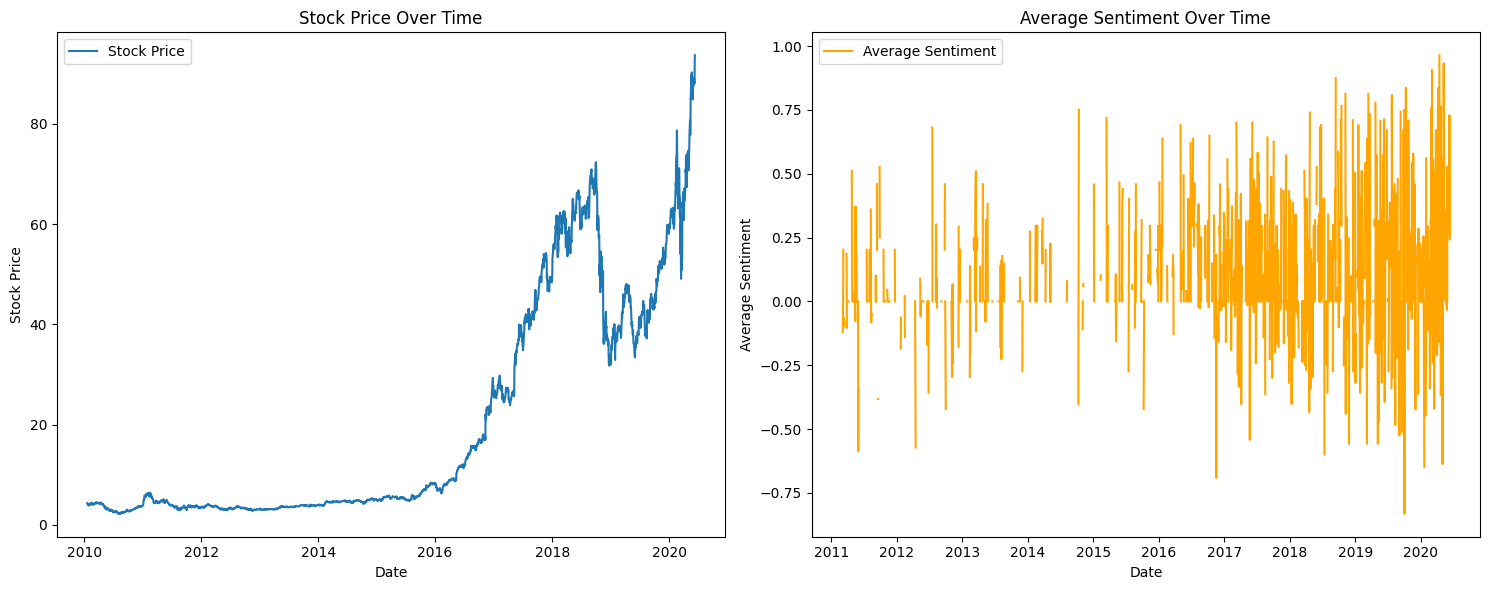

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(merged_data['Date'], merged_data['Close'], label='Stock Price')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Over Time')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(merged_data['Date'], merged_data['Sentiment'], label='Average Sentiment', color='orange')
plt.xlabel('Date')
plt.ylabel('Average Sentiment')
plt.title('Average Sentiment Over Time')
plt.legend()

plt.tight_layout()
plt.show()


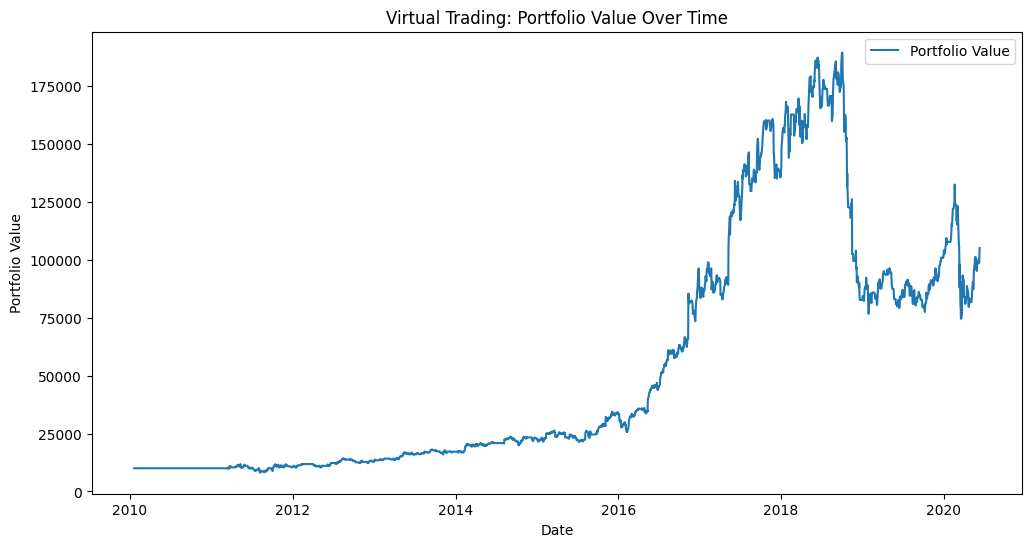

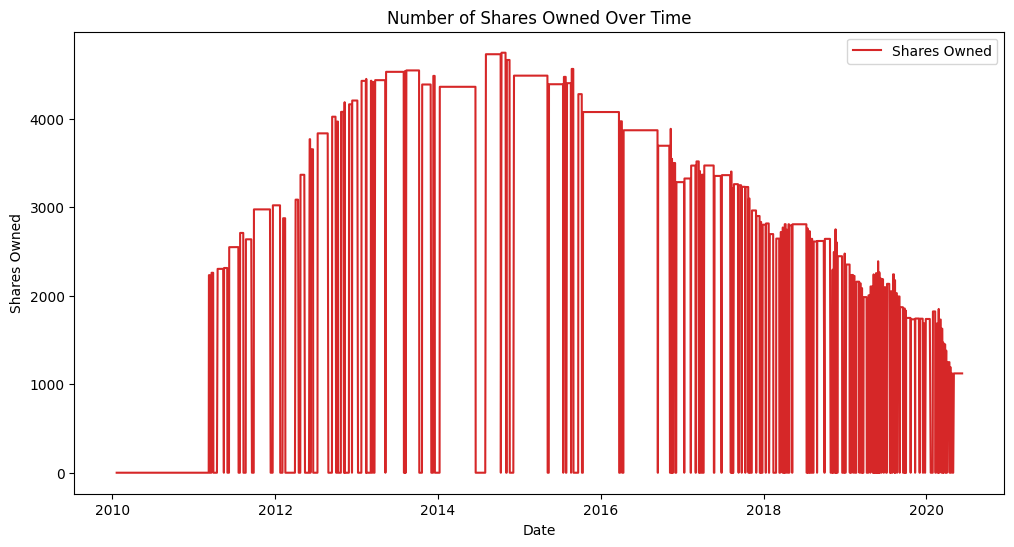

In [25]:
import matplotlib.pyplot as plt

# Initialize portfolio
cash = 10000
shares_owned = 0
portfolio_values = []
shares_history = []  # To track the number of shares owned over time

# Iterate over each day in the merged data
for index, row in merged_data.iterrows():
    stock_price = row['Close']
    sentiment = row['Sentiment']

    if sentiment > 0.05:  # Buy
        if cash > 0:
            # Buy as many shares as possible
            shares_bought = cash // stock_price
            cash -= shares_bought * stock_price
            shares_owned += shares_bought

    elif sentiment < -0.05:  # Sell
        if shares_owned > 0:
            # Sell all shares
            cash += shares_owned * stock_price
            shares_owned = 0
    
    # Update portfolio value (cash + value of owned shares)
    portfolio_value = cash + (shares_owned * stock_price)
    portfolio_values.append(portfolio_value)
    shares_history.append(shares_owned)  # Record the number of shares owned

# Plot the portfolio value over time
plt.figure(figsize=(12, 6))
plt.plot(merged_data['Date'], portfolio_values, label='Portfolio Value', color='tab:blue')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.title('Virtual Trading: Portfolio Value Over Time')
plt.legend()
plt.show()

# Plot the number of shares owned over time
plt.figure(figsize=(12, 6))
plt.plot(merged_data['Date'], shares_history, label='Shares Owned', color='tab:red')
plt.xlabel('Date')
plt.ylabel('Shares Owned')
plt.title('Number of Shares Owned Over Time')
plt.legend()
plt.show()


In [26]:
# Final portfolio value
print(f"Final Portfolio Value: {round(portfolio_value, 2)}")
increase = round(portfolio_value - 10000, 2)
print(f"Increase from Initial Investment: {increase}")
percentage_increase = round((increase / 10000) * 100, 2)
print(f"Percentage Increase: {percentage_increase}%")

Final Portfolio Value: 105095.72
Increase from Initial Investment: 95095.72
Percentage Increase: 950.96%
